# Advanced usage of plotting utilities from Nilearn

In this tutorial, we show you how to use plotting utilities from Nilearn for user specific displaying of the end results. We show you how to explore our plotting utilities in a user friendly manner.

In [8]:
%matplotlib inline

### Notes:

All options demonstrating here are from `:class:nilearn.plotting.displays.OrthoSlicer`. A class implemented to create 3 linked axes for plotting orthogonal cuts of 3D maps heavily used for Nilearn plotting tools.

In this section, we show you how to use different `display modes` to plot the results in user specific directions. The current `display_mode` available in Nilearn plotting tools are `display_mode='ortho', 'x', 'xz', 'y', 'yx', 'yz', 'z'`. By default, all plotting tools use 'ortho' mode which means displaying along the x,y,z directions.

Please see below that we are focussed on using `display_mode` with `cut_coords`, two parameters which are essential in displaying in different modes.

# Display modes and cut coords

## Defaults: Plotting constrast maps using default `display_mode='ortho'` and `cut_coords=None`

In [9]:
 # localizer datasets from nilearn datasets module
from nilearn import datasets

localizer_dataset = datasets.fetch_localizer_contrasts(
    ["left vs right button press"],
    n_subjects=2)
localizer_cmap_filename = localizer_dataset.cmaps[1]

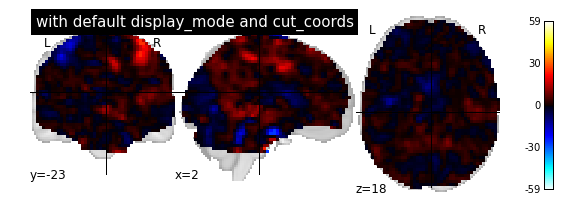

In [10]:
# Plotting demonstration with default display_mode and cut_coords
from nilearn import plotting

plotting.plot_stat_map(localizer_cmap_filename, title='with default display_mode and cut_coords')

As you can see that, by default display_mode='ortho' displays slices in three (x, y, z) directions with cut_coords automatically positioned by itself without specifying them explicitly.

## Positioning the cut of the coordinates

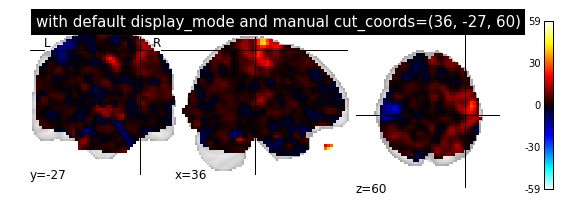

In [4]:
# Manually positioning the cut_coords to have a straight forward cut towards activations
plotting.plot_stat_map(localizer_cmap_filename, cut_coords=(36, -27, 60),
                       title='with default display_mode and manual cut_coords=(36, -27, 60)')

## Change default display: `display_mode='x'`

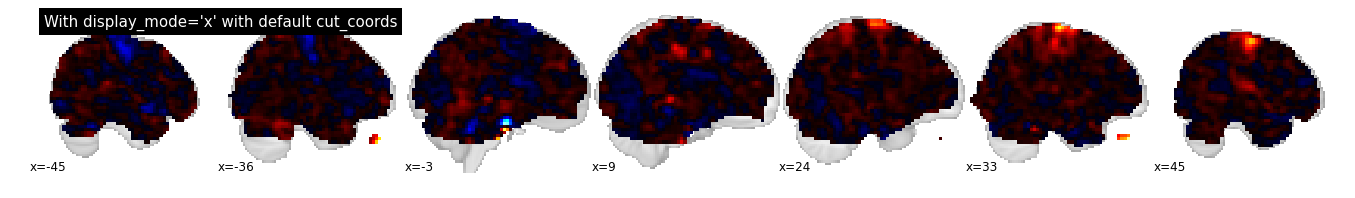

In [11]:
# Manually forcing displays in display_mode='x' direction and default cut_coords
plotting.plot_stat_map(localizer_cmap_filename, display_mode='x', colorbar=False,
                      title="With display_mode='x' with default cut_coords")

From what we observe that, default cut_coords can project 7 different 'x' directional slices. To restrict the number of slices, we can use cut_coords to specific number of slices as we want as shown below.

## Display only one slice: `cut_coords=1`

Here we will use an integer in cut_coords

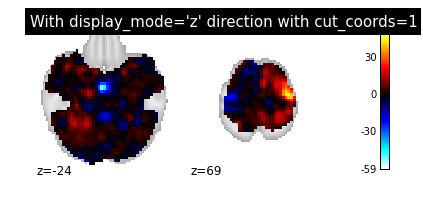

In [12]:
# With display_mode='z' direction and manually controlling to display only in 1 slice
# but not manually controlling the positioning of the coordinates
plotting.plot_stat_map(localizer_cmap_filename, display_mode='z', cut_coords=2,
                      title="With display_mode='z' direction with cut_coords=1")

## Display two slices with explicit cut of the coordinates

We can give a list of coordinate to `cut_coords=(-36, 36)`

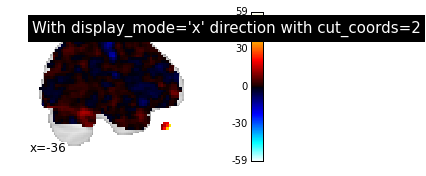

In [15]:
# With display_mode='x' direction and now manually controlling both number of slices
# to display and positioning of the coornidates in the displays by giving (-36, 36) or [-36, 36]
plotting.plot_stat_map(localizer_cmap_filename, display_mode='x', cut_coords=[-36, 36],
                       title="With display_mode='x' direction with cut_coords=2")

# Plots in two different cut directions

We can specific `display_mode='xz'` to have two cuts in different directions (we could also specific 'xy', or 'yz'

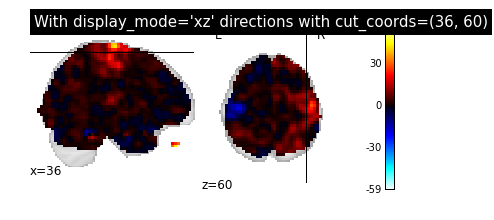

In [16]:
# Display two different modes 'xz' and manually setting two different coordinates for
# both directions (36, 60)
plotting.plot_stat_map(localizer_cmap_filename, display_mode='xz', cut_coords=(36, 60),
                       title="With display_mode='xz' directions with cut_coords=(36, 60)")

As you can observe that, there is a huge difference between setting the parameter specifically cut_coords as single integer like `cut_coords=5` than `cut_coords=[5]`. According to the implementation, `cut_coords=[5]` or `cut_coords=(5)` will display the images in 5 slices and positioning the coordinated in 5th slice location. Whereas `cut_coords=5` will simply display 5 slices with automatic positioning of 5 slices by itself as you have observed in above plotting demonstration.

# Demonstration of various plotting objects from Orthoslicer utilities such as `add_edges`, `add_contours`, `add_overlay`

Help on `nilearn.plotting.displays.OrthoSlicer` for more information. For now we will make it simple to follow.
###Notes:
In this section, we show you how to use different OrthoSlicer utilities manually configuring the combination of using specific choice of basic plotting type as shown in easy plotting tutorial with different OrthoSlicer utilities. This section will be looking like a fancy demonstration.

Different types of objects available are `add_edges`, `add_contours`, `add_overlay` can be used for displaying their end results such as 3D maps image on anatomical/EPI templates. These objects are inherited automatically when you import plotting functions which means there is in no need of explicitly importing these objects.

# Plots using `add_edges` with combination of `plot_anat` plotting type function.  

This combination is useful when we want to validate the coregistration between anatomical image and functional datasets (mean image).

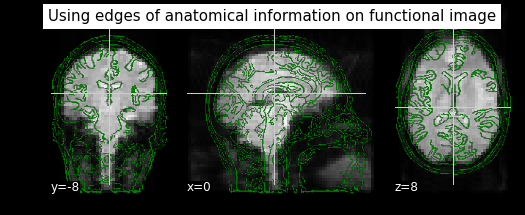

In [18]:
# We import datasets specifically useful for this demonstration
from nilearn import datasets

haxby_dataset = datasets.fetch_haxby(n_subjects=1)
haxby_anat_filename = haxby_dataset.anat[0]
haxby_mask_filename = haxby_dataset.mask_vt[0]
haxby_func_filename = haxby_dataset.func[0]

# Take the mean of the functional datasets in time domain, we import mean_img
from nilearn.image import mean_img
mean_functional_image = mean_img(haxby_func_filename)

from nilearn import plotting

# we use the return value of the plotting functions from which we can use directly add_edges 
display = plotting.plot_anat(mean_functional_image, title="Using edges of anatomical information on functional image")

# Two parameters, first argument:anatomical image to overlay, second argument:color
display.add_edges(haxby_anat_filename, color='g')

# Plots using `add_contours` with and without color fillings with `cmap`

This combination is useful when we want to visually check the mask image or ROI image by overlaying onto the anatomical image or functional image. 

More help on `matplotlib.pylab.contour` or `matplotlib.pylab.contourf`

## Without color fillings inside contours

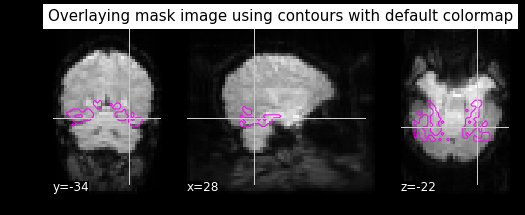

In [19]:
# Contours without fillings
# We use the same datasets as imported above.

display = plotting.plot_anat(mean_functional_image, cut_coords=(28, -34, -22),
                             title="Overlaying mask image using contours with default colormap")

# parameters, first argument:mask image/roi image, second argument:filled
# specifically for contour fillings by default it is False.

# extra keywords arguments such as levels, colors, etc can be used readily
# compatible with matplotlib pylab contour function.

# Here, we use levels=[0.5] as tuple and default colormap and linewidths.
# You can tune the levels parameter for more sparser representations.
display.add_contours(haxby_mask_filename, levels=[0.5], colors='magenta')

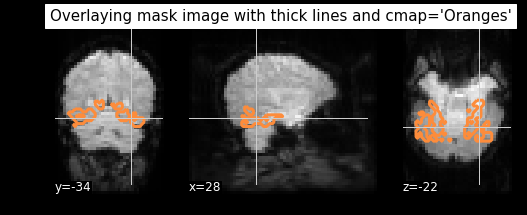

In [34]:
# We should call invidually two plotting functions explicitly for seperate plots
display = plotting.plot_anat(mean_functional_image, cut_coords=(28, -34, -22),
                             title="Overlaying mask image with thick lines and cmap='Oranges'")

# linewidths=4. for thick lines and manual cmap settings
display.add_contours(haxby_mask_filename, levels=[0.5], cmap='Oranges', linewidths=3.)

## Plots using `add_contours` with two different ROIs

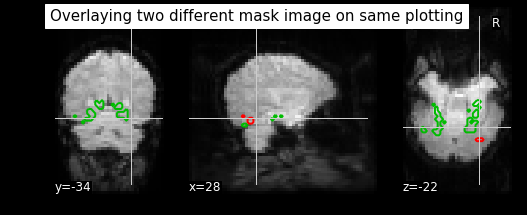

In [35]:
# Two different masks in the same plotting type
mask_house = haxby_dataset.mask_house[0]
mask_face = haxby_dataset.mask_face[0]

# We use the same plotting function for overlaying two different masks
display = plotting.plot_anat(mean_functional_image, cut_coords=(28, -34, -22),
                             title="Overlaying two different mask image on same plotting")
display.add_contours(mask_house, levels=[0.5], cmap='nipy_spectral', linewidths=2.)
display.add_contours(mask_face, levels=[0.5], colors='r', linewidths=2.)

## Plots using `add_contours` with color fillings `filled=True` inside contours

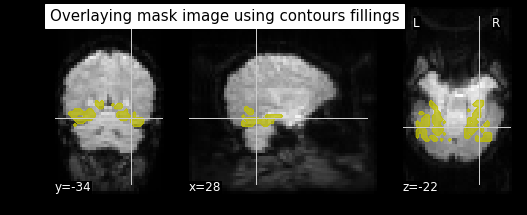

In [36]:
# Contours with fillings
display = plotting.plot_anat(mean_functional_image, cut_coords=(28, -34, -22),
                             title="Overlaying mask image using contours fillings")

# parameters, first argument:mask image/roi image, second argument:filled=True
# specifically for contour fillings

# compulsory extra keywords arguments such as levels, colors, alpha, etc can be
# used readily compatible with matplotlib pylab contourf function.

# More parameters used are filled=True and alpha=0.7 sets the transparency of the color
# inside contour fillings
display.add_contours(haxby_mask_filename, filled=True, alpha=0.7, 
                     levels=[0.5], colors=['y'])

Note: There are difference in the parameters settings in both cases. For example, parameter such as either 'cmap' or 'colors' can be used for colors plotting of contours whereas as parameter 'colors' is valid in contours with fillings case. Also, colors and alpha should be defined as list type rather than single string 'y'.

## Plots using `add_contours` with and without color fillings on `plot_glass_brain` type.

This combination is useful when we want to overlay our statistical analysis results onto the schematic brain image. 

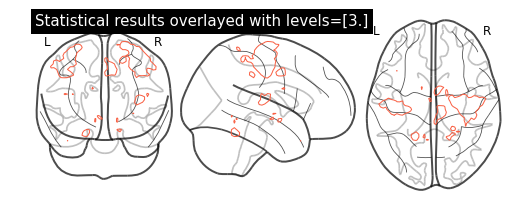

In [21]:
# Overlaying statistical results as contours onto Glass Brain image
# We use statistical maps in 3D from localizer datasets for this demonstration
from nilearn import datasets

localizer_dataset = datasets.fetch_localizer_contrasts(
    ["left vs right button press"],
    n_subjects=2,
    get_tmaps=True)
localizer_tmap_filename = localizer_dataset.tmaps[1]

# Here, you can see the importance of setting levels=[3.] which acts
# mostly similar to threshold parameter as in plotting functions

display = plotting.plot_glass_brain(None,
                                    title='Statistical results overlayed with levels=[3.]')
# With levels=[3.]
display.add_contours(localizer_tmap_filename, levels=[3.], cmap='Reds')

## How important is setting the parameter `levels` in `add_contours`

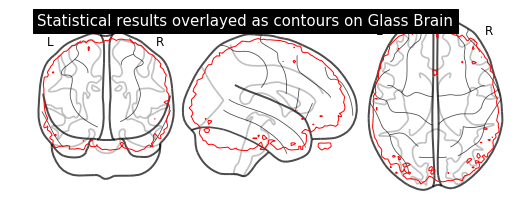

In [38]:
# We want to overlay the fetched map on Glass Brain.
# In this scenario, we simply replace plot_anat with plot_glass_brain as demonstrated previously.
display = plotting.plot_glass_brain(None,
                                    title='Statistical results overlayed as contours on Glass Brain')
# With levels=[1.]
display.add_contours(localizer_tmap_filename, levels=[1.], colors='r')

## Plots using `add_contours` in black background

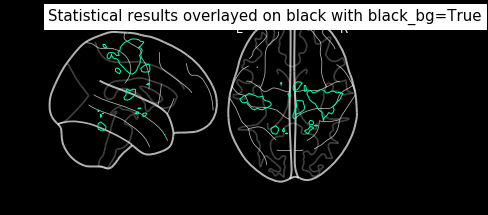

In [39]:
# Here, we show contour plots on glass brain with black background
display = plotting.plot_glass_brain(None, title='Statistical results overlayed on black with black_bg=True',
                                    black_bg=True, display_mode='xz')
display.add_contours(localizer_tmap_filename, levels=[3.], cmap='gist_rainbow')

## Statistical results in both negative and positive values using `add_contours` with `filled=True`

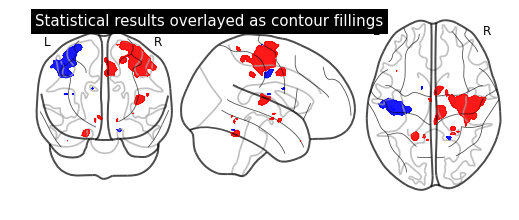

In [24]:
# In this setting, we show contour plots on glass brain with color fillings inside the contours
# blue indicates the negative values, red indicates positive values.
display = plotting.plot_glass_brain(None, title='Statistical results overlayed as contour fillings',
                                    plot_abs=False)
# positive statistical values
display.add_contours(localizer_tmap_filename, filled=True, levels=[3], colors='r', alpha=0.9)
# negative statistical values
display.add_contours(localizer_tmap_filename, filled=True, levels=[-4.7, -3], colors='b', alpha=0.9)

Note: Here, the levels argument should be set with great caution by seeing the range of statistical values. Otherwise, we end up getting unexpected plotting results.

## Plots using `add_overlay` on reference image

#### The combination we use is `plot_stat_map`. 

This section particularly demonstrates how to overlay probabilistic atlas in 4D to 3D image overlaying onto the high resolution anatomical image with fancy user defined colors. The default anatomical image in `plot_stat_map` is MNI template.

/usr/lib/python2.7/dist-packages/numpy/ma/core.py:3847: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


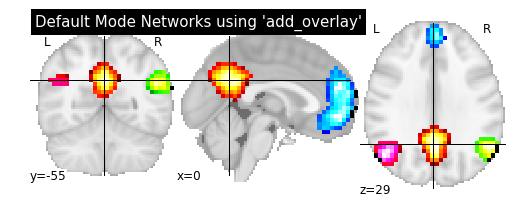

In [25]:
# We acquire predefined results which are in 4D (x, y, z, n_maps) from Nilearn datasets
from nilearn import datasets

atlas = datasets.fetch_atlas_msdl()
atlas_maps = atlas.maps

# We import index_img from Nilearn image module to get the maps in 3D
from nilearn.image import index_img

# Calling plot_stat_map plotting function with no threshold since maps are already thresholded
display = plotting.plot_stat_map(index_img(atlas_maps, 4), colorbar=False,
                                 title="Default Mode Networks using 'add_overlay'")

# You can add other maps as an overlay with various colors of your choice
# colors should be defined as cmap argument using colormaps from Nilearn plotting
display.add_overlay(index_img(atlas_maps, 5), cmap=plotting.cm.black_blue)
display.add_overlay(index_img(atlas_maps, 6), cmap=plotting.cm.black_green)
display.add_overlay(index_img(atlas_maps, 3), cmap=plotting.cm.black_pink)

## Plots using unthresholded statistical maps with `add_overlay`

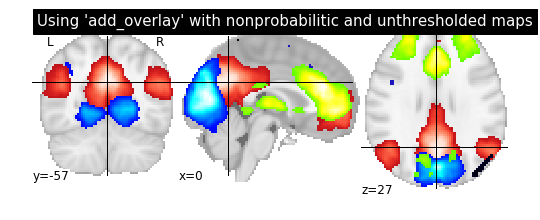

In [42]:
# Now you can see how to use unthreshold maps in add_overlay setting
from nilearn import datasets

# Fetching unthresholded ICA results
ica_atlas = datasets.fetch_atlas_smith_2009()
ica_maps = ica_atlas.rsn10

display = plotting.plot_stat_map(index_img(ica_maps, 3), colorbar=False,
                                 threshold=3, cmap=plotting.cm.blue_red,
                                 title="Using 'add_overlay' with nonprobabilitic "
                                       "and unthresholded maps")

display.add_overlay(index_img(ica_maps, 0), threshold=3, cmap=plotting.cm.black_blue)
display.add_overlay(index_img(ica_maps, 7), threshold=4, cmap=plotting.cm.black_green)

## Plots showing figure initialization, axes, title (size and color) 

In this scenario, we are dependent on explicitly importing matplotlib plotting utilities. 

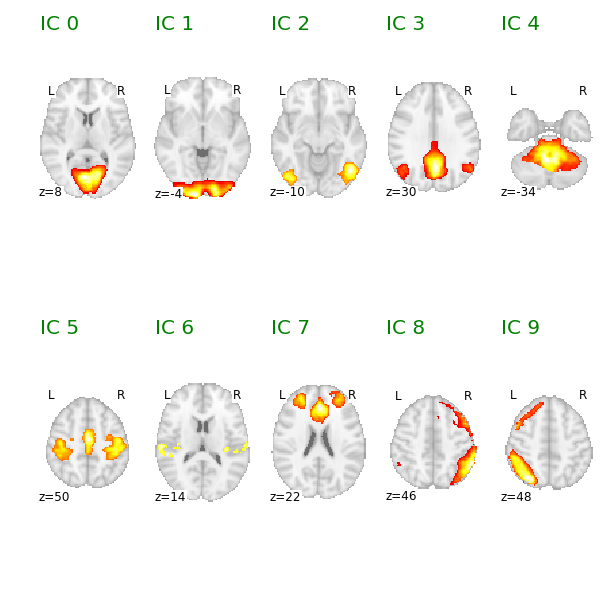

In [43]:
import matplotlib.pyplot as plt
from nilearn.image import iter_img

# You can increase figure size changing fig=(x, x)
fig, axx = plt.subplots(nrows=2, ncols=5, figsize=(10, 10))

from nilearn.image import iter_img
ii = 0
jj = 0
for i, each_map in enumerate(iter_img(ica_maps)):
    if ii > 4:
        ii = 0
        jj = 1
    display = plotting.plot_stat_map(each_map, display_mode="z",
                                     cut_coords=1,
                                     colorbar=False, threshold=5,
                                     figure=fig, axes=axx[jj, ii])
    display.title("IC %d" % i, color='g', size=20, bgcolor='w')
    ii += 1

## Saving the outputs in .png, .pdf, .svg

In [45]:
# Saving outputs using .png file format
display.savefig('filelocation.pdf')